# Import

In [1]:
import pandas as pd
import graphviz
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Image
from IPython.display import Markdown, display as ds
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# READFILE AND PREPROCESSING

In [2]:
col_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]

df = pd.read_csv(
    r'Data/processed.cleveland.csv',
	encoding = 'latin1',
    names = col_names,
    header = None,
    na_values = '?'
)

y = df['num'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('num', axis = 1)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
df.dropna(
    subset=[
        'age','sex','cp','trestbps','chol','fbs',
        'restecg','thalach','exang','oldpeak','slope','ca','thal'
    ],
    inplace=True
)

df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

df = pd.get_dummies(
    df,
    columns=['sex','cp','restecg','slope','thal'],
    drop_first=True
)

df

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,True,False,False,False,False,True,False,True,True,False
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,True,False,False,True,False,True,True,False,False,False
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,True,False,False,True,False,True,True,False,False,True
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,True,False,True,False,False,False,False,True,False,False
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,1,False,False,False,True,False,False,True,False,False,True
298,45.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,True,False,False,False,False,False,True,False,False,True
299,68.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,1,True,False,False,True,False,False,True,False,False,True
300,57.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,1,True,False,False,True,False,False,True,False,False,True


# TRAIN SPLIT TEST

This task sets up the training and test datasets for the upcoming experiments.  
Using the features and labels above, please prepare the following four subsets:

● `feature_train`: a set of training samples.  
● `label_train`: a set of labels corresponding to the samples in `feature_train`.  
● `feature_test`: a set of test samples with a structure to `feature_train`.  
● `label_test`: a set of labels corresponding to the samples in `feature_test`. 

Finish to create subsets: ['40/60', '60/40', '80/20', '90/10']


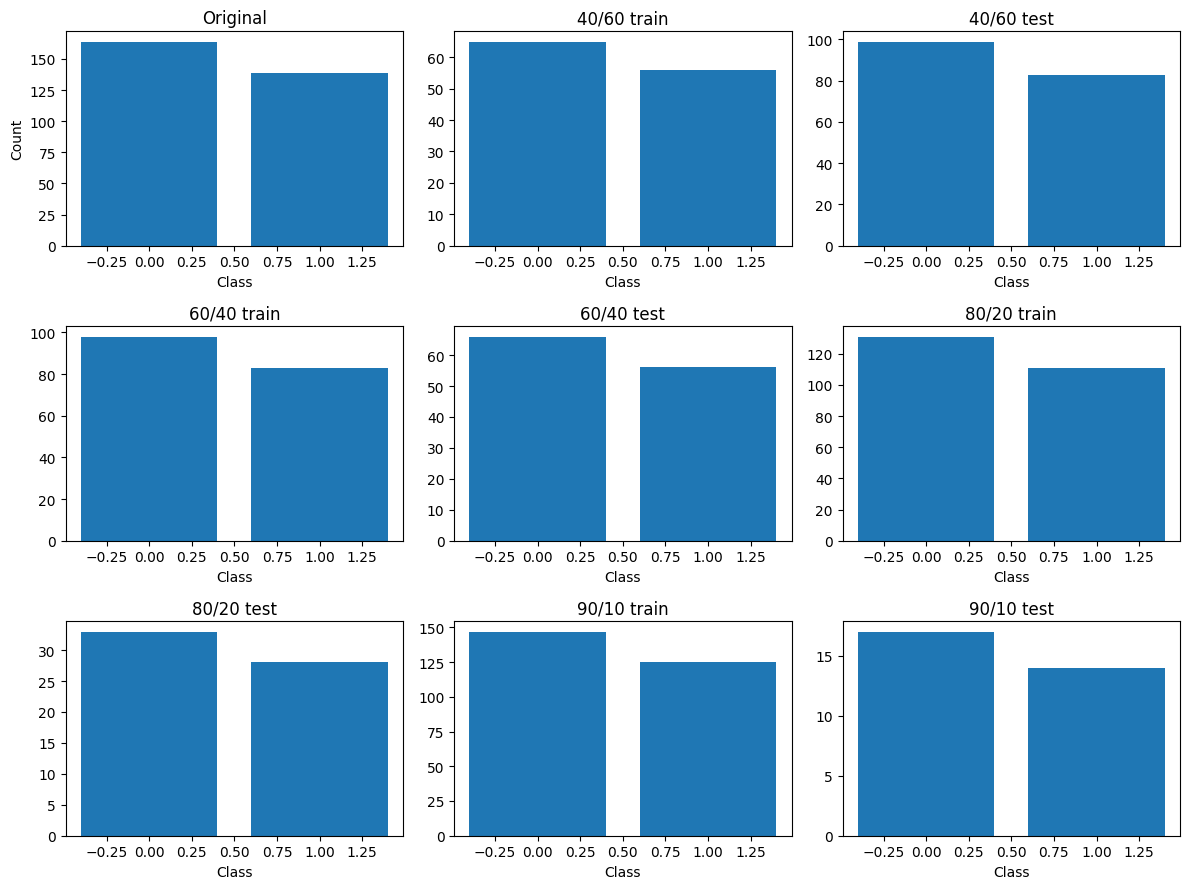

In [5]:
ratios = [
    (0.4, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (0.9, 0.1),
]

subsets = {}

for tr, te in ratios:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, 
        train_size = tr, 
        stratify = y, 
        random_state = 42
    )
    key = f'{int(tr * 100)}/{int(te * 100)}'
    subsets[key] = {
        'X_train': X_tr, 'y_train': y_tr,
        'X_test' : X_te, 'y_test' : y_te,
    }

print("Finish to create subsets:", list(subsets.keys()))


# Tỷ lệ gốc
orig_counts = y.value_counts(normalize=True).sort_index()

for key, data in subsets.items():
    tr_counts = data['y_train'].value_counts(normalize=True).sort_index()
    te_counts = data['y_test' ].value_counts(normalize=True).sort_index()
    # So sánh xem có chênh lệch quá 1 mẫu không
    assert all((tr_counts - orig_counts * len(data['y_train'])/len(y)).abs() <= 1), f"{key} train lệch quá 1 mẫu!"
    assert all((te_counts - orig_counts * len(data['y_test'])/len(y)).abs() <= 1),  f"{key} test lệch quá 1 mẫu!"

def plot_all_distributions(y, subsets):
    n_plots = 1 + len(subsets)*2   # 1 original + mỗi split 2 (train & test)
    cols = 3
    rows = (n_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()

    # 1) Original
    cnt = y.value_counts().sort_index()
    axes[0].bar(cnt.index, cnt.values)
    axes[0].set_title('Original')
    axes[0].set_xlabel('Class'); axes[0].set_ylabel('Count')

    # 2) Train & Test cho từng tỷ lệ
    idx = 1
    for key, data in subsets.items():
        # train
        cnt = data['y_train'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values)
        axes[idx].set_title(f'{key} train')
        axes[idx].set_xlabel('Class')
        idx += 1
        # test
        cnt = data['y_test'].value_counts().sort_index()
        axes[idx].bar(cnt.index, cnt.values)
        axes[idx].set_title(f'{key} test')
        axes[idx].set_xlabel('Class')
        idx += 1

    # Tắt các subplot thừa
    for ax in axes[idx:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_all_distributions(y, subsets)


# TRAIN MODEL 

In [6]:
clf_dict = {}

In [7]:
key = '40/60'
data = subsets[key]

clf_40_60 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_40_60.fit(data['X_train'], data['y_train'])
clf_dict[key] = clf_40_60

In [8]:
key = '60/40'
data = subsets[key]

clf_60_40 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_60_40.fit(data['X_train'], data['y_train'])
clf_dict[key] = clf_60_40

In [9]:
key = '80/20'
data = subsets[key]

clf_80_20 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_80_20.fit(data['X_train'], data['y_train'])
clf_dict[key] = clf_80_20

In [10]:
key = '90/10'
data = subsets[key]

clf_90_10 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_90_10.fit(data['X_train'], data['y_train'])
clf_dict[key] = clf_90_10

# VISUALIZE DECISION TREE

### Decision Tree (40/60) ###

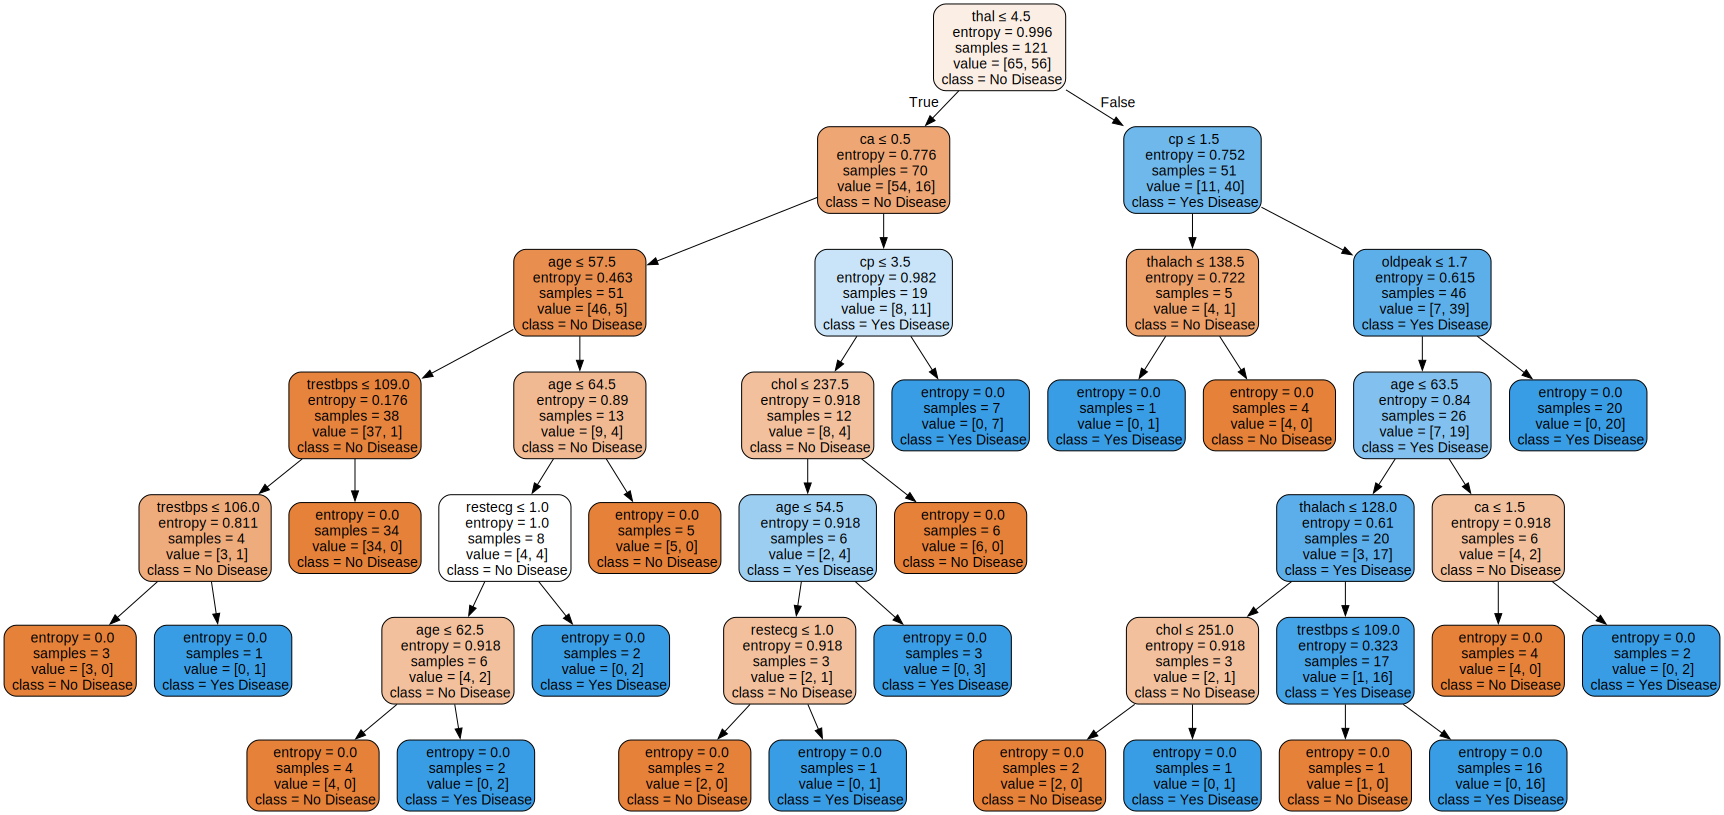

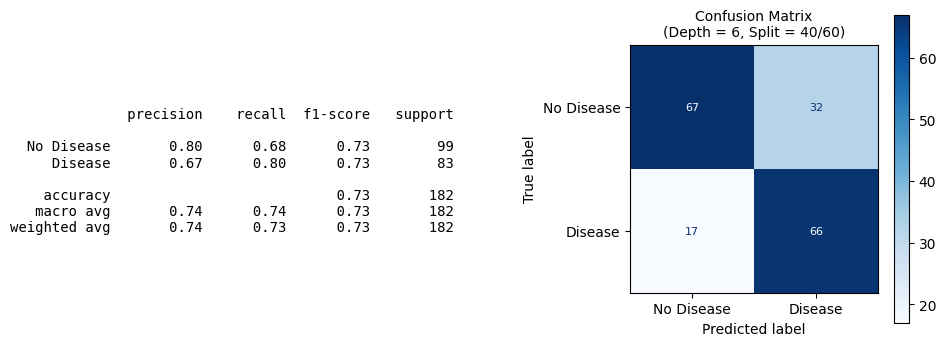

### Decision Tree (60/40) ###

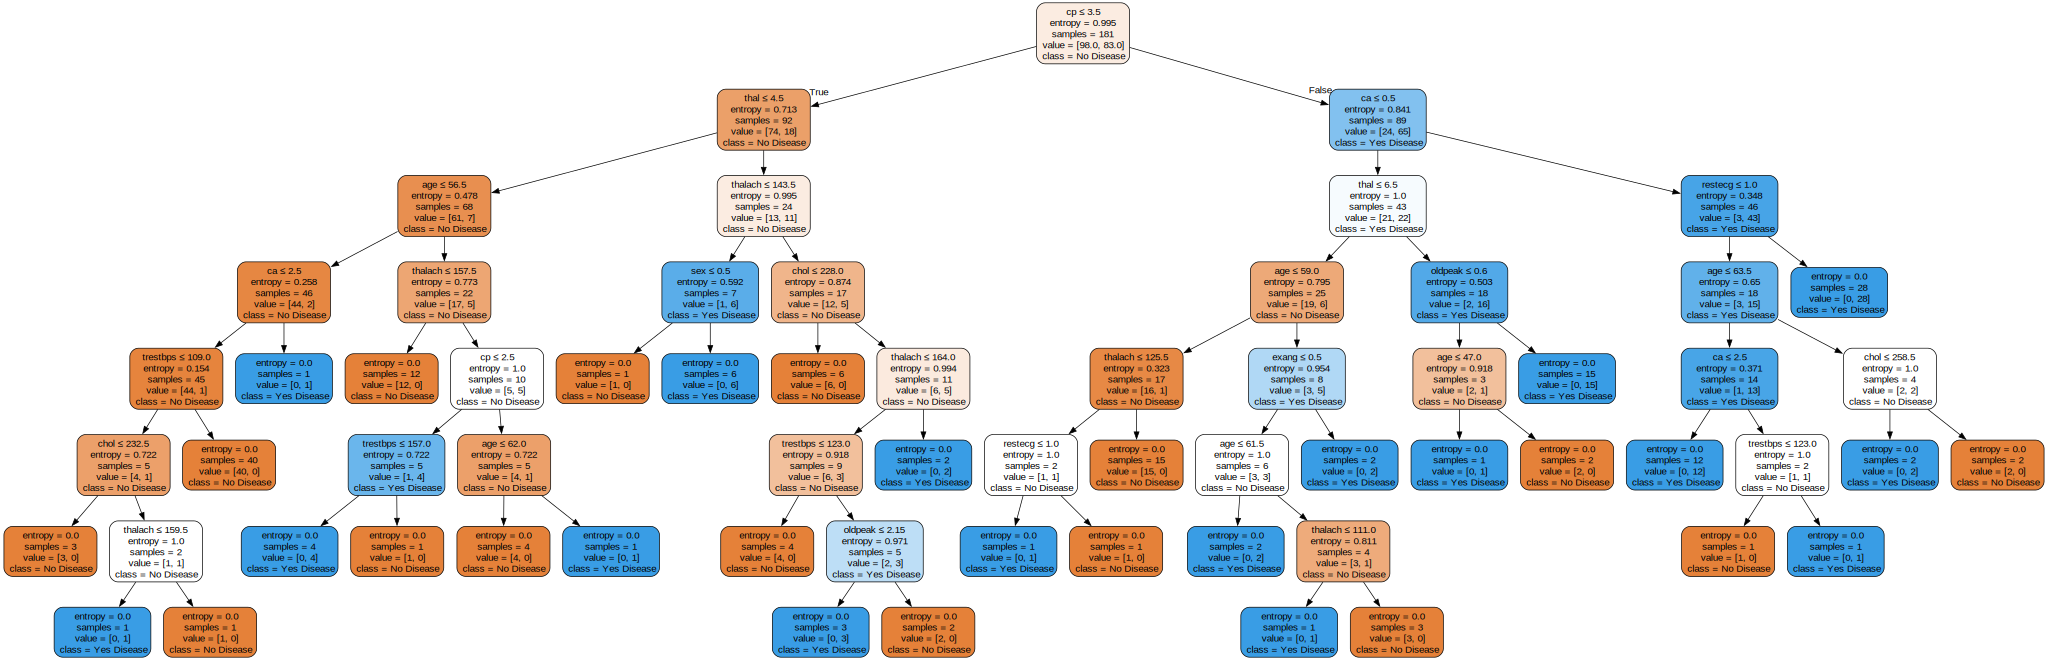

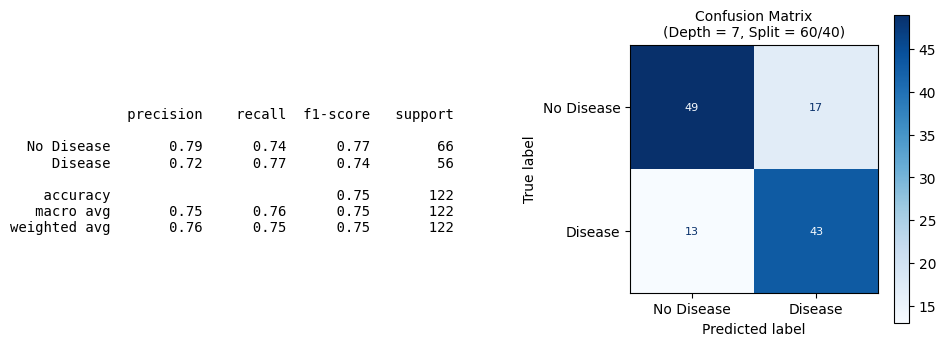

### Decision Tree (80/20) ###

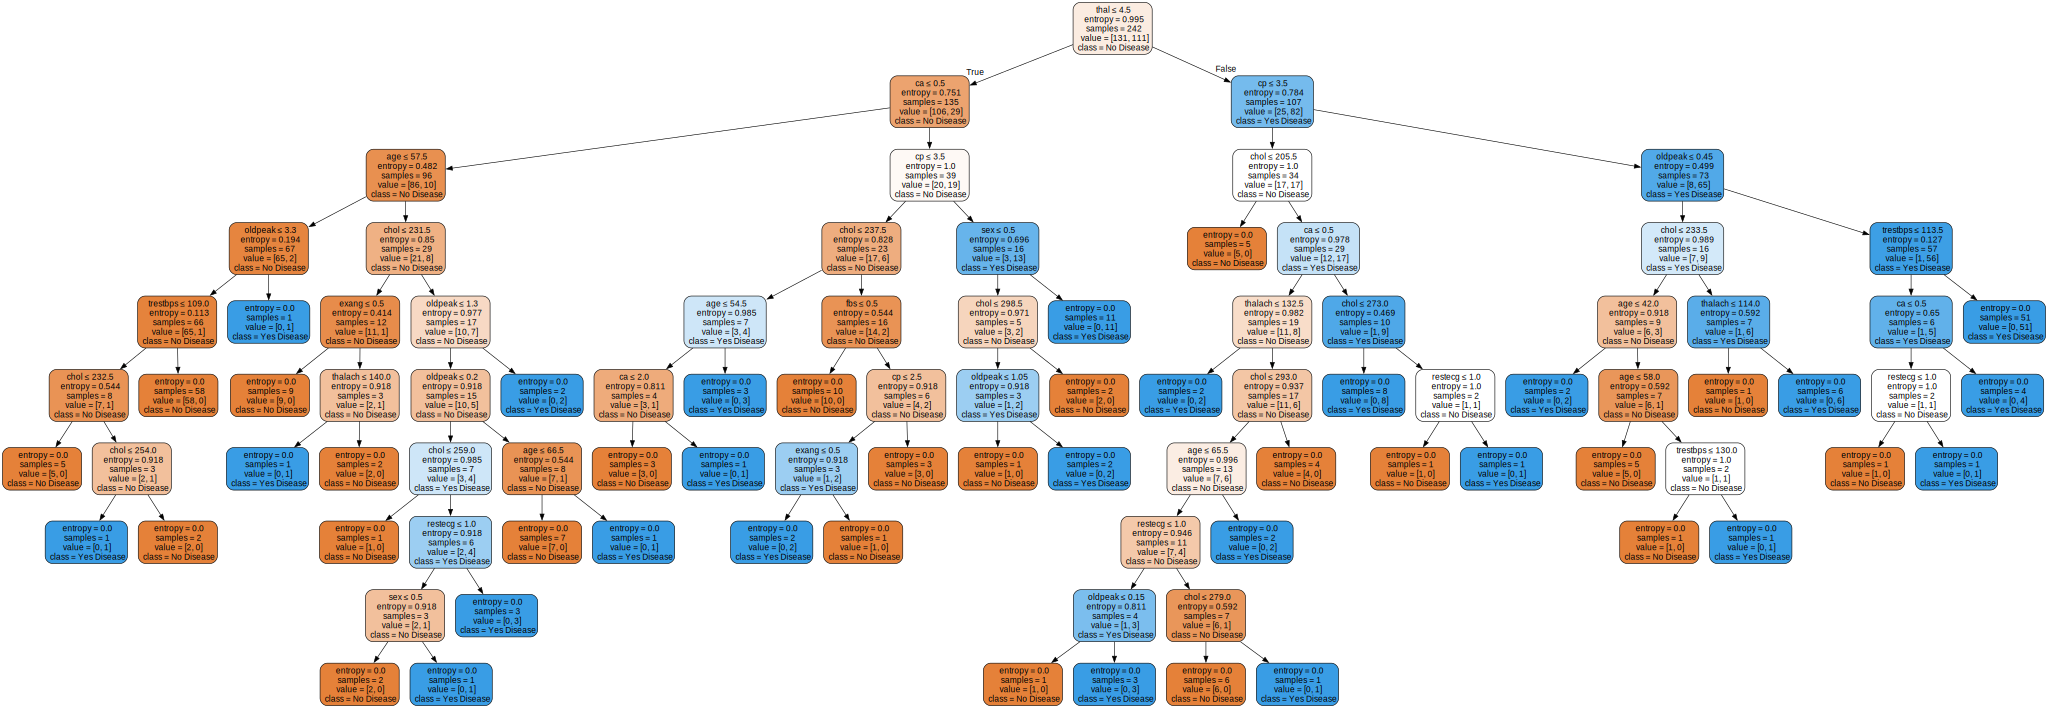

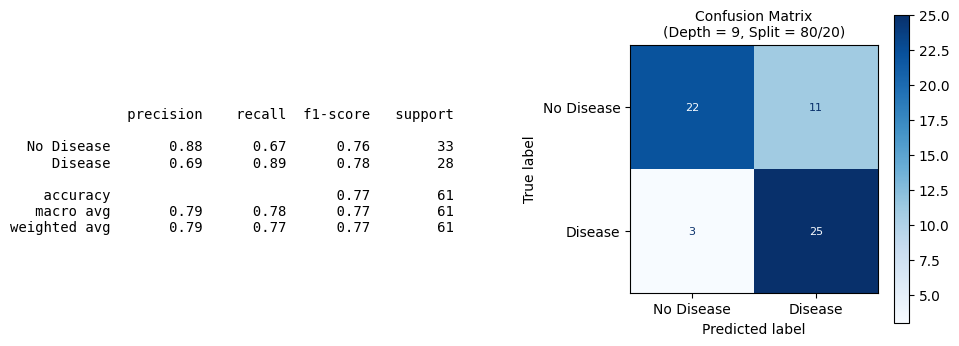

### Decision Tree (90/10) ###

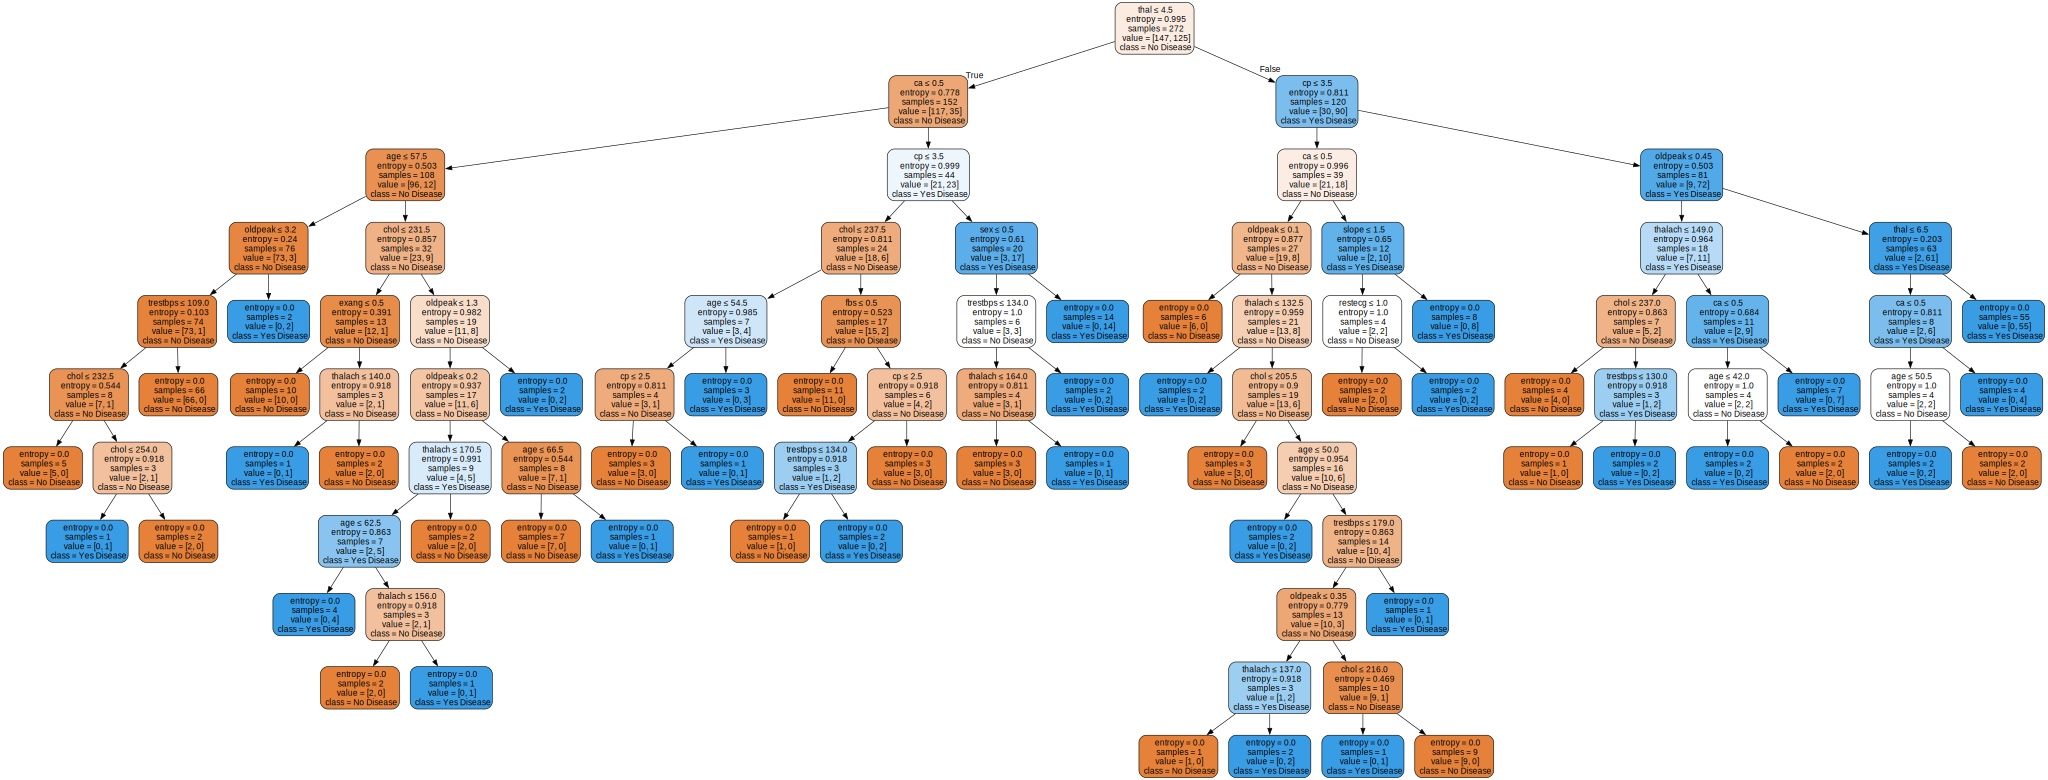

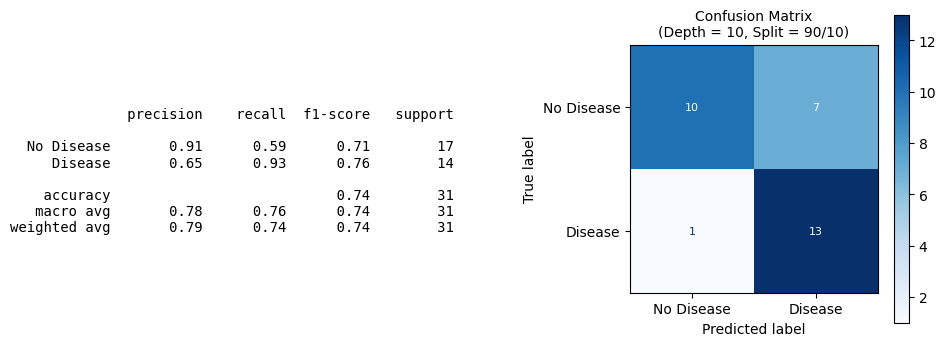

In [11]:
# 2. Xuất và hiển thị bằng Graphviz
for key, clf in clf_dict.items():
    ds(Markdown(f"### Decision Tree ({key}) ###"))
    
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=subsets[key]['X_train'].columns.tolist(),
        class_names=['No Disease', 'Yes Disease'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)

    X_test = subsets[key]['X_test']
    y_test = subsets[key]['y_test']
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred, target_names = ['No Disease', 'Disease'])
    cm     = confusion_matrix(y_test, y_pred)

    max_depth = clf.get_depth()
    train_test_ratio = key 

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Bên trái: Classification Report ---
    axes[0].axis('off')
    axes[0].text(0, 0.7, report,
                 fontsize = 10,
                 verticalalignment = 'top',
                 fontfamily = 'monospace')

    # --- Bên phải: Confusion Matrix ---
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = ['No Disease', 'Disease'])
    disp.plot(ax = axes[1], cmap = 'Blues', values_format = 'd')

    # Thu nhỏ font trong các ô của CM
    for txt in axes[1].texts:
        txt.set_fontsize(8)
    # Thu nhỏ tick labels
    axes[1].tick_params(axis = 'both', labelsize = 10)
    # Title với depth & ratio
    axes[1].set_title(f"Confusion Matrix\n(Depth = {max_depth}, Split = {train_test_ratio})",
                      fontsize=10)

    # Điều chỉnh khoảng cách giữa 2 subplot
    plt.subplots_adjust(wspace = 1, hspace = 0.2)

    plt.show()


# EVALUATION METRICS

In [12]:
key = '40/60'
data = subsets[key]
clf  = clf_dict[key]

# Dự đoán trên tập test tương ứng
y_pred = clf.predict(data['X_test'])
y_true = data['y_test']

# Tính accuracy
accuracy = accuracy_score(y_true, y_pred)

# Tính số và tỉ lệ mẫu bị phân loại sai
misclassified_count = (y_pred != y_true).sum()
total_samples      = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 49/182
Ratio of wrong labels: 26.92%


In [13]:
key = '60/40'
data = subsets[key]
clf  = clf_dict[key]

# Dự đoán trên tập test tương ứng
y_pred = clf.predict(data['X_test'])
y_true = data['y_test']

# Tính accuracy
accuracy = accuracy_score(y_true, y_pred)

# Tính số và tỉ lệ mẫu bị phân loại sai
misclassified_count = (y_pred != y_true).sum()
total_samples      = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 30/122
Ratio of wrong labels: 24.59%


In [14]:
key = '80/20'
data = subsets[key]
clf  = clf_dict[key]

# Dự đoán trên tập test tương ứng
y_pred = clf.predict(data['X_test'])
y_true = data['y_test']

# Tính accuracy
accuracy = accuracy_score(y_true, y_pred)

# Tính số và tỉ lệ mẫu bị phân loại sai
misclassified_count = (y_pred != y_true).sum()
total_samples      = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 14/61
Ratio of wrong labels: 22.95%


In [15]:
key = '90/10'
data = subsets[key]
clf  = clf_dict[key]

# Dự đoán trên tập test tương ứng
y_pred = clf.predict(data['X_test'])
y_true = data['y_test']

# Tính accuracy
accuracy = accuracy_score(y_true, y_pred)

# Tính số và tỉ lệ mẫu bị phân loại sai
misclassified_count = (y_pred != y_true).sum()
total_samples      = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 8/31
Ratio of wrong labels: 25.81%


### Decision Tree (80/20), Max Depth = None

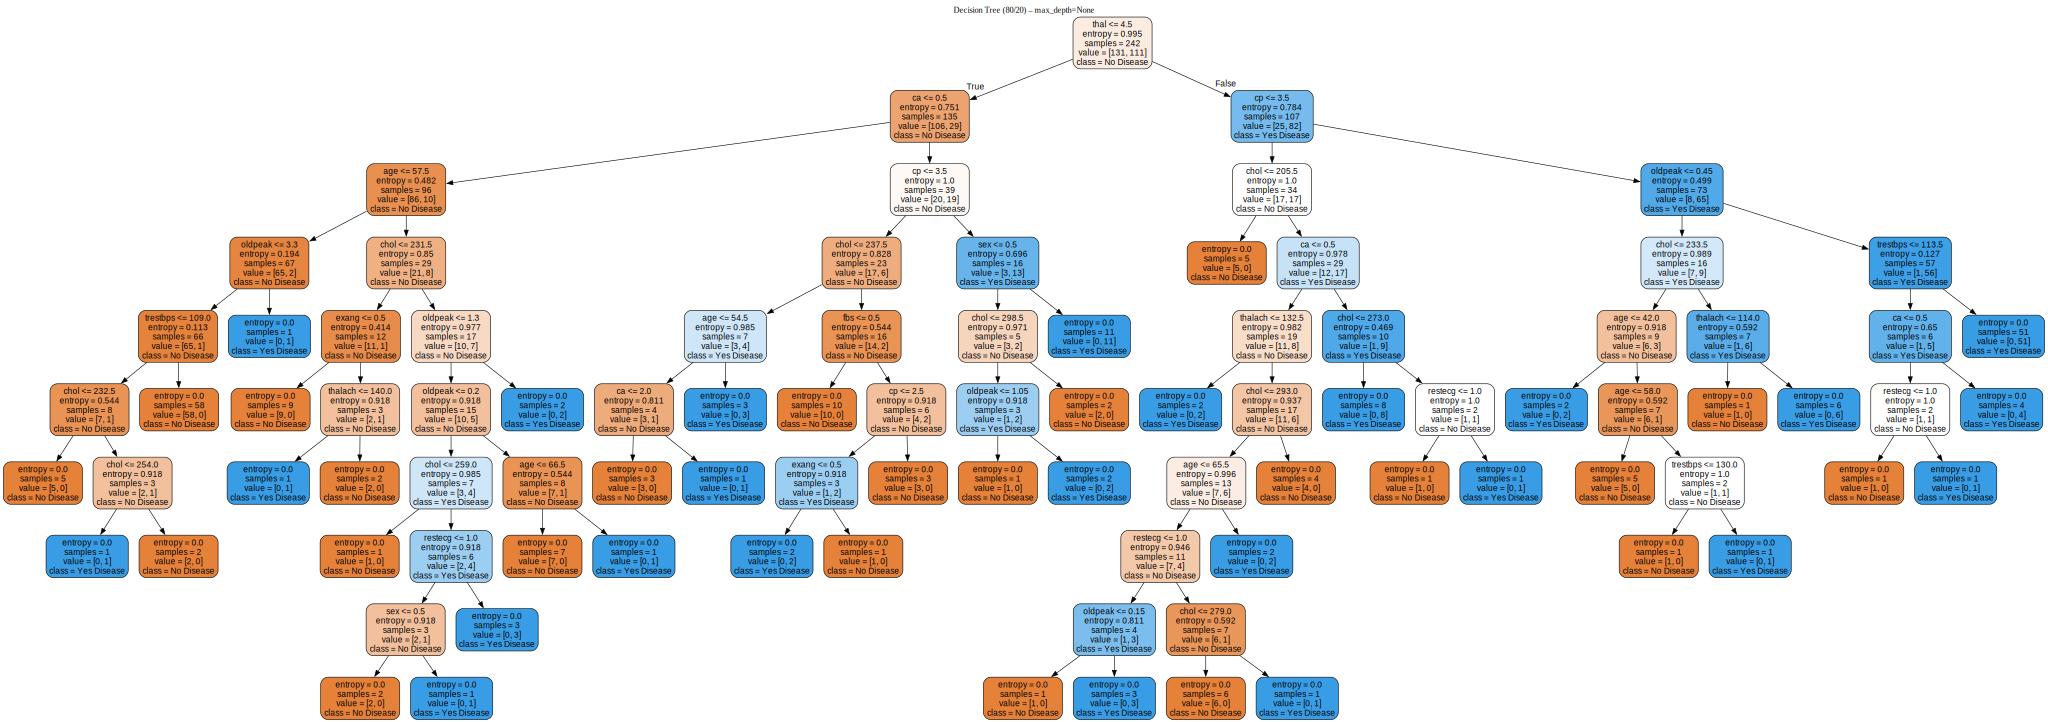

### Decision Tree (80/20), Max Depth = 2

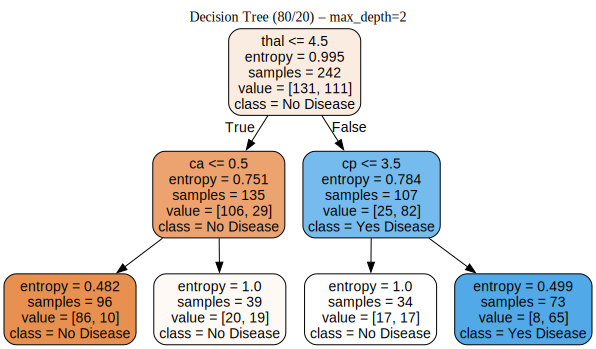

### Decision Tree (80/20), Max Depth = 3

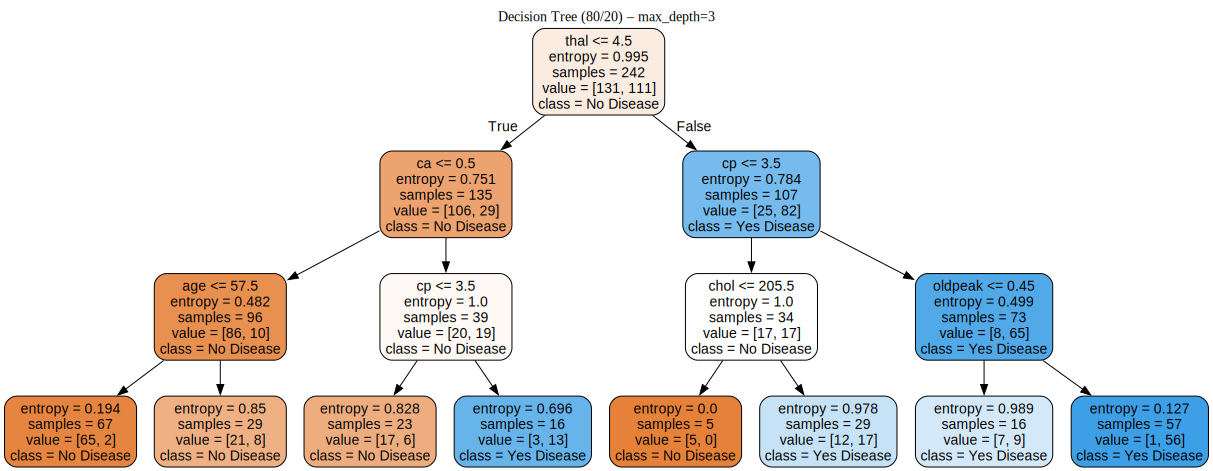

### Decision Tree (80/20), Max Depth = 4

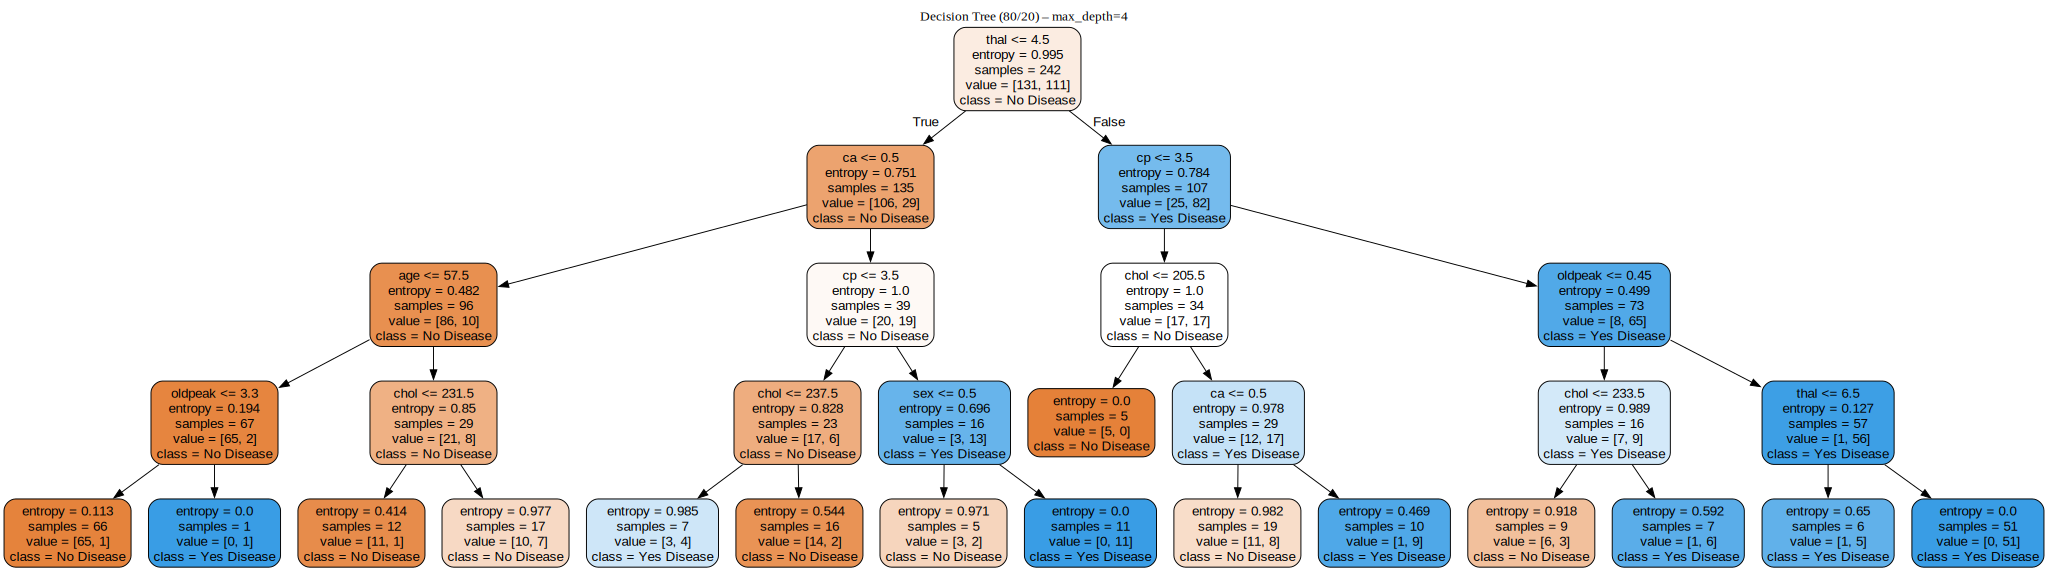

### Decision Tree (80/20), Max Depth = 5

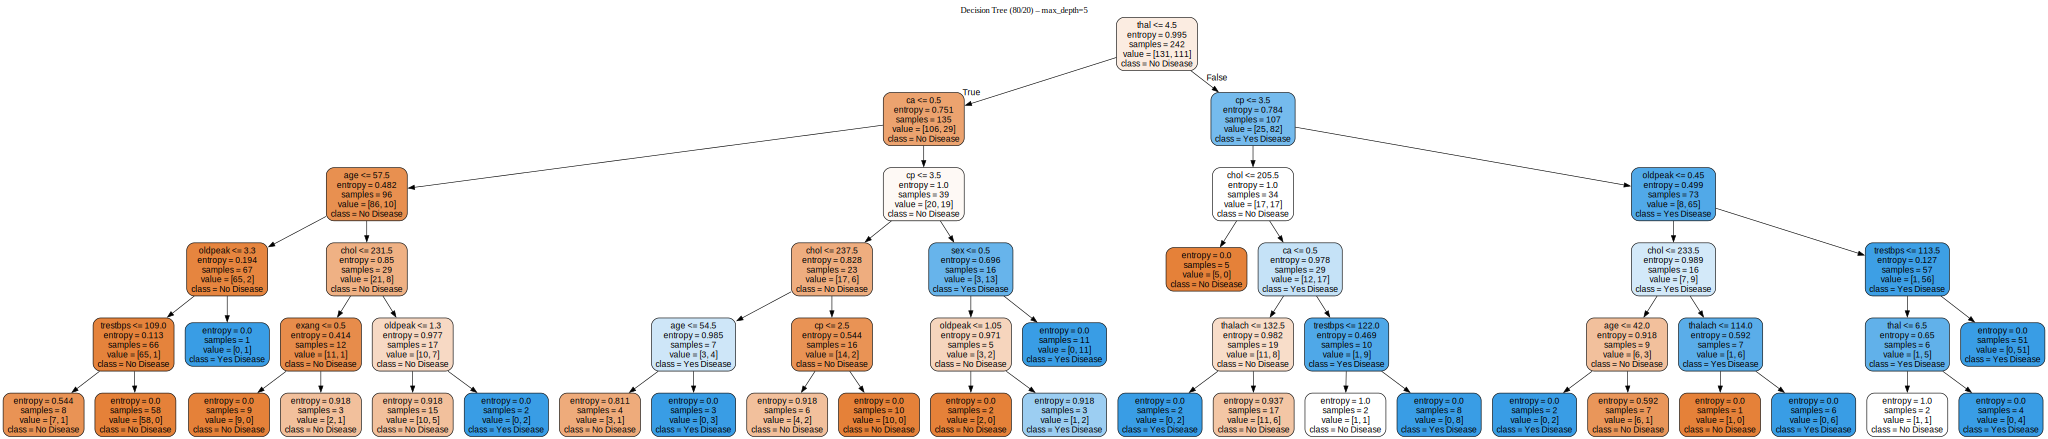

### Decision Tree (80/20), Max Depth = 6

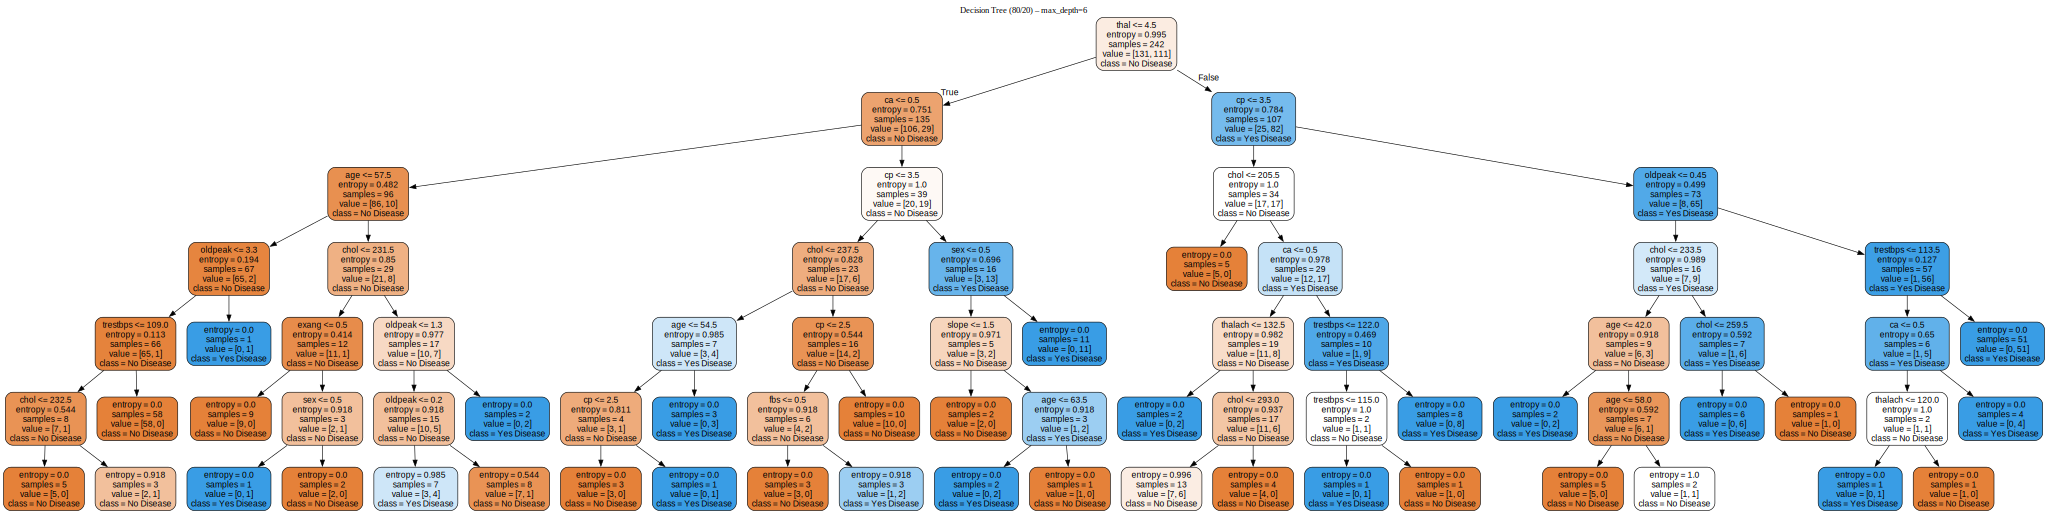

### Decision Tree (80/20), Max Depth = 7

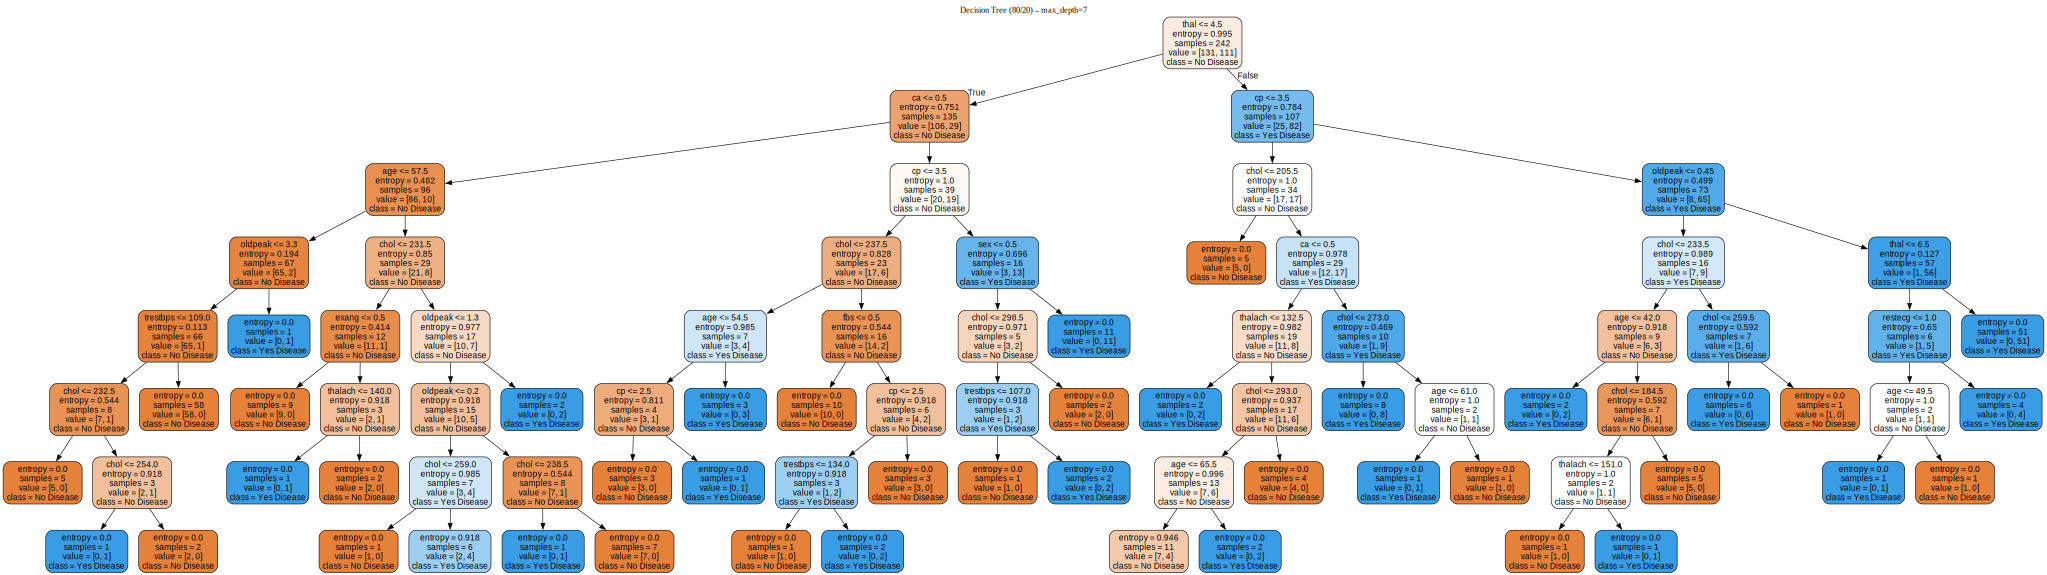

max_depth  Accuracy
     None  0.770492
        2  0.770492
        3  0.786885
        4  0.786885
        5  0.803279
        6  0.704918
        7  0.688525


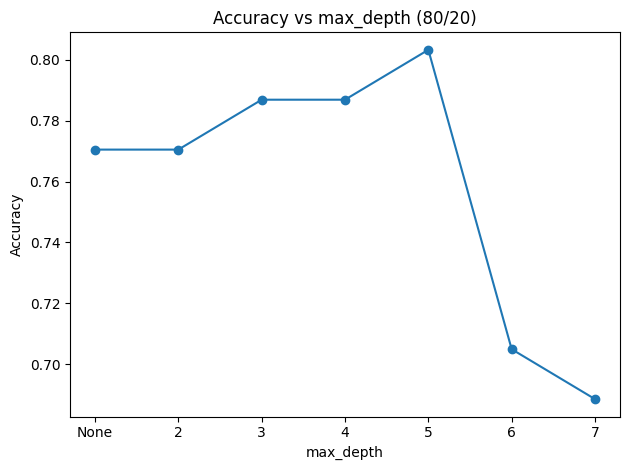

In [16]:
data_8020 = subsets['80/20']
X_train = data_8020['X_train']
y_train = data_8020['y_train']
X_test, y_test = data_8020['X_test'], data_8020['y_test']
feature_cols = X_train.columns.tolist()

# 2) Huấn luyện, đo accuracy, vẽ từng cây
depths = [None, 2, 3, 4, 5, 6, 7]
results = []

for d in depths:
    # a) Huấn luyện
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = d, random_state = 42)
    clf.fit(X_train, y_train)

    # b) Đo accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((d, acc))

    # c) Xuất và vẽ cây quyết định
    dot = export_graphviz(
        clf, out_file = None,
        feature_names = feature_cols,
        class_names = ['No Disease', 'Yes Disease'],
        filled = True, rounded=True
    )
    # Thêm tiêu đề vào Graphviz
    depth_label = 'None' if d is None else str(d)
    dot = re.sub(
        r'(digraph Tree \{)',
        fr"""\1
        labelloc="t";
        label="Decision Tree (80/20) – max_depth={depth_label}";""",
        dot
    )
    graph = graphviz.Source(dot)

    display(Markdown(f"### Decision Tree (80/20), Max Depth = {depth_label}"))
    display(graph)

# 3) Tạo bảng tổng hợp và vẽ đồ thị
depth_vals, acc_vals = zip(*results)
depth_labels = ['None' if d is None else str(d) for d in depth_vals]

df = pd.DataFrame({'max_depth': depth_labels, 'Accuracy': acc_vals})
print(df.to_string(index=False))

plt.figure()
plt.plot(depth_labels, acc_vals, marker = 'o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth (80/20)')
plt.tight_layout()
plt.show()

# EXTENDED WORK : RANDOM FOREST CLASSIFICATION

In [17]:
key = '40/60'
data = subsets[key]

# Train Random Forest
clf_rf_40_60 = RandomForestClassifier(n_estimators=10, random_state=42)
clf_rf_40_60.fit(data['X_train'], data['y_train'])

# Predict
y_pred_rf = clf_rf_40_60.predict(data['X_test'])

# Confusion Matrix
cm_rf = confusion_matrix(data['y_test'], y_pred_rf)
print(f"Confusion Matrix (Random Forest - {key}):")
print(cm_rf)

# Classification Report
print(f"Classification Report (Random Forest - {key}):")
print(classification_report(data['y_test'], y_pred_rf))


Confusion Matrix (Random Forest - 40/60):
[[84 15]
 [17 66]]
Classification Report (Random Forest - 40/60):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.81      0.80      0.80        83

    accuracy                           0.82       182
   macro avg       0.82      0.82      0.82       182
weighted avg       0.82      0.82      0.82       182



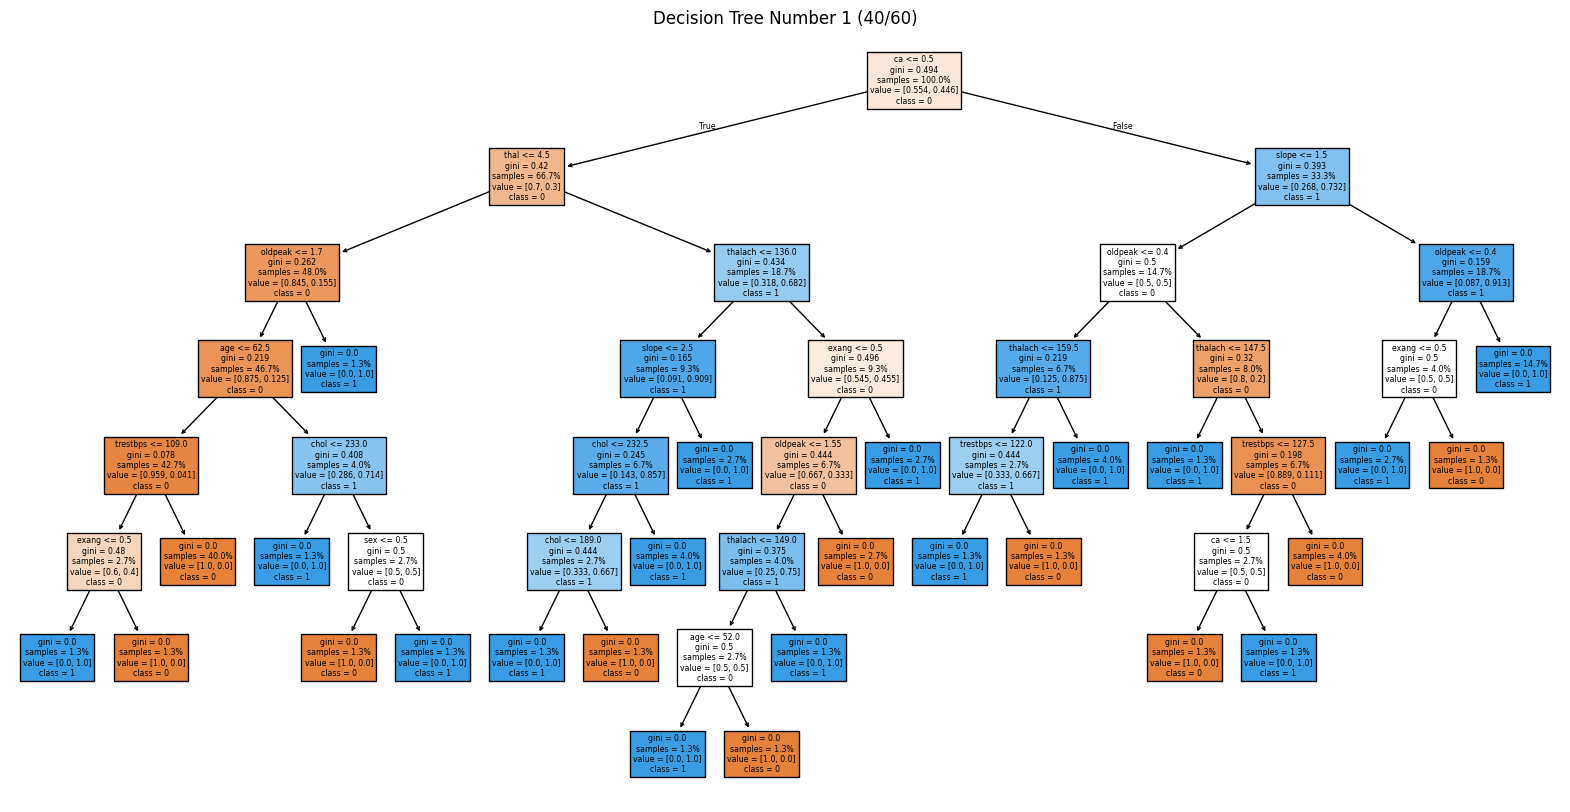

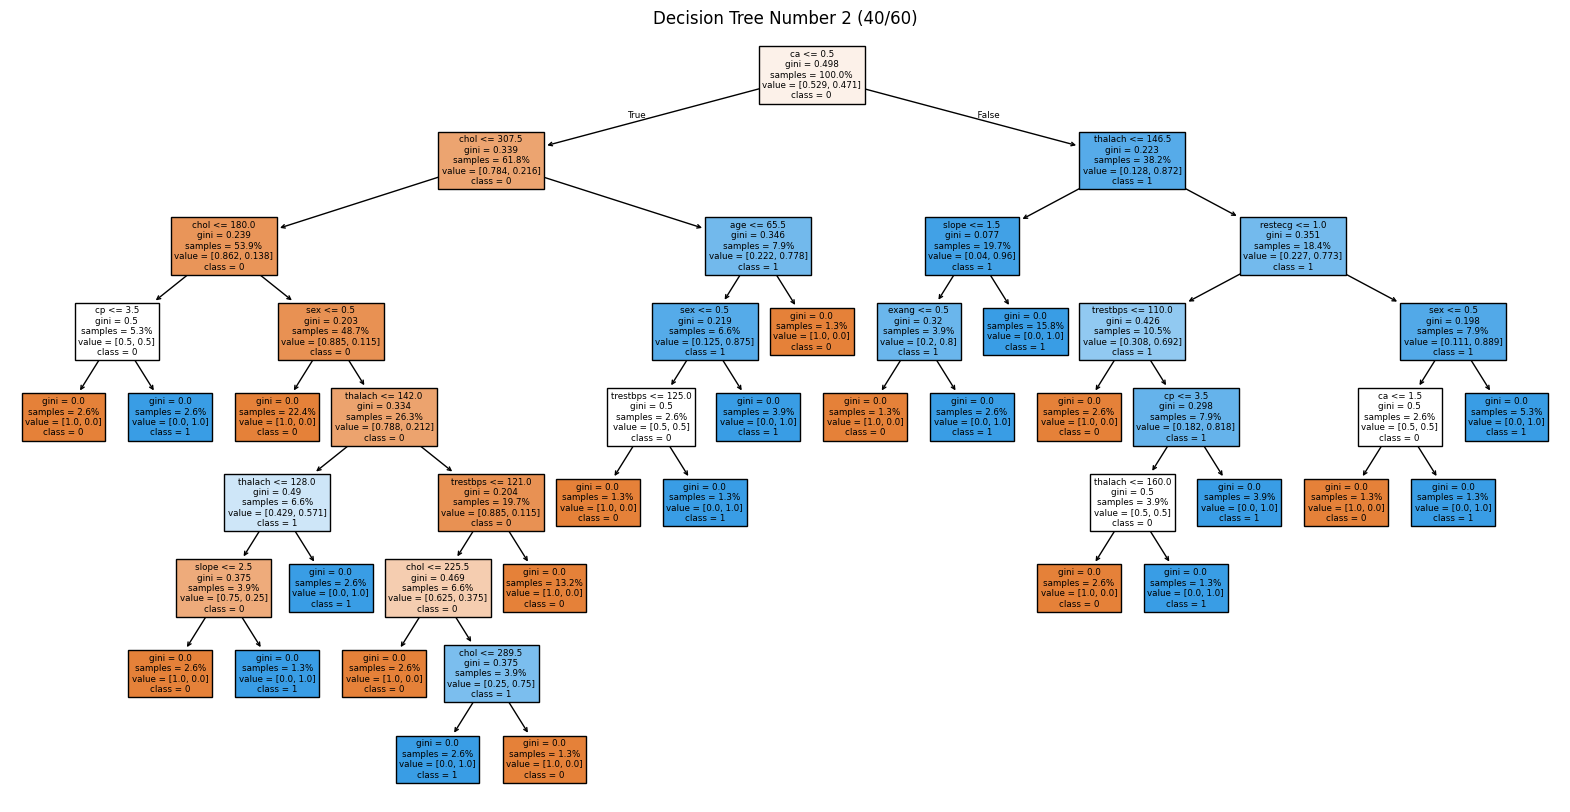

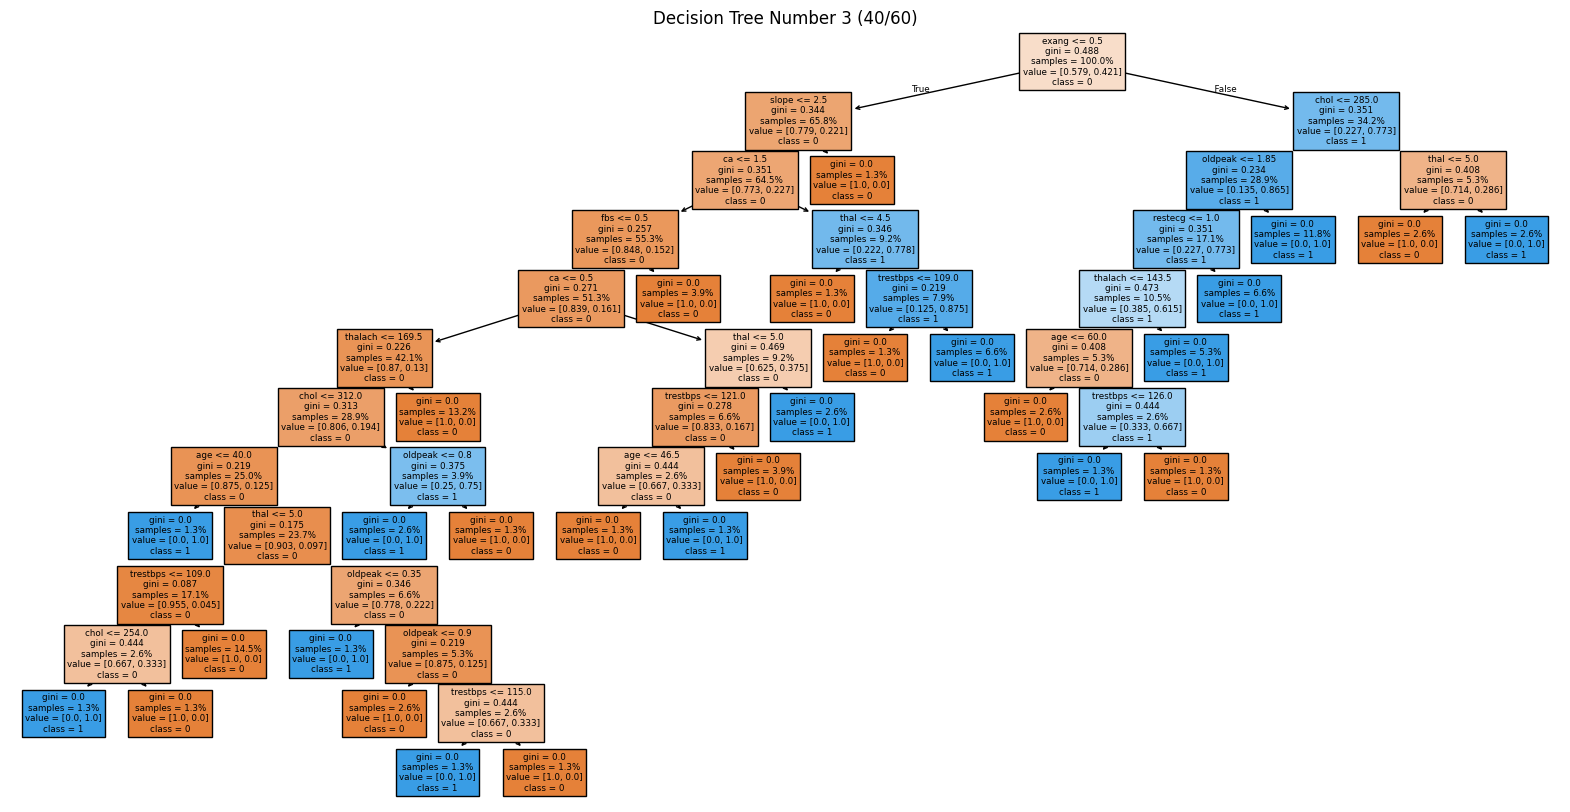

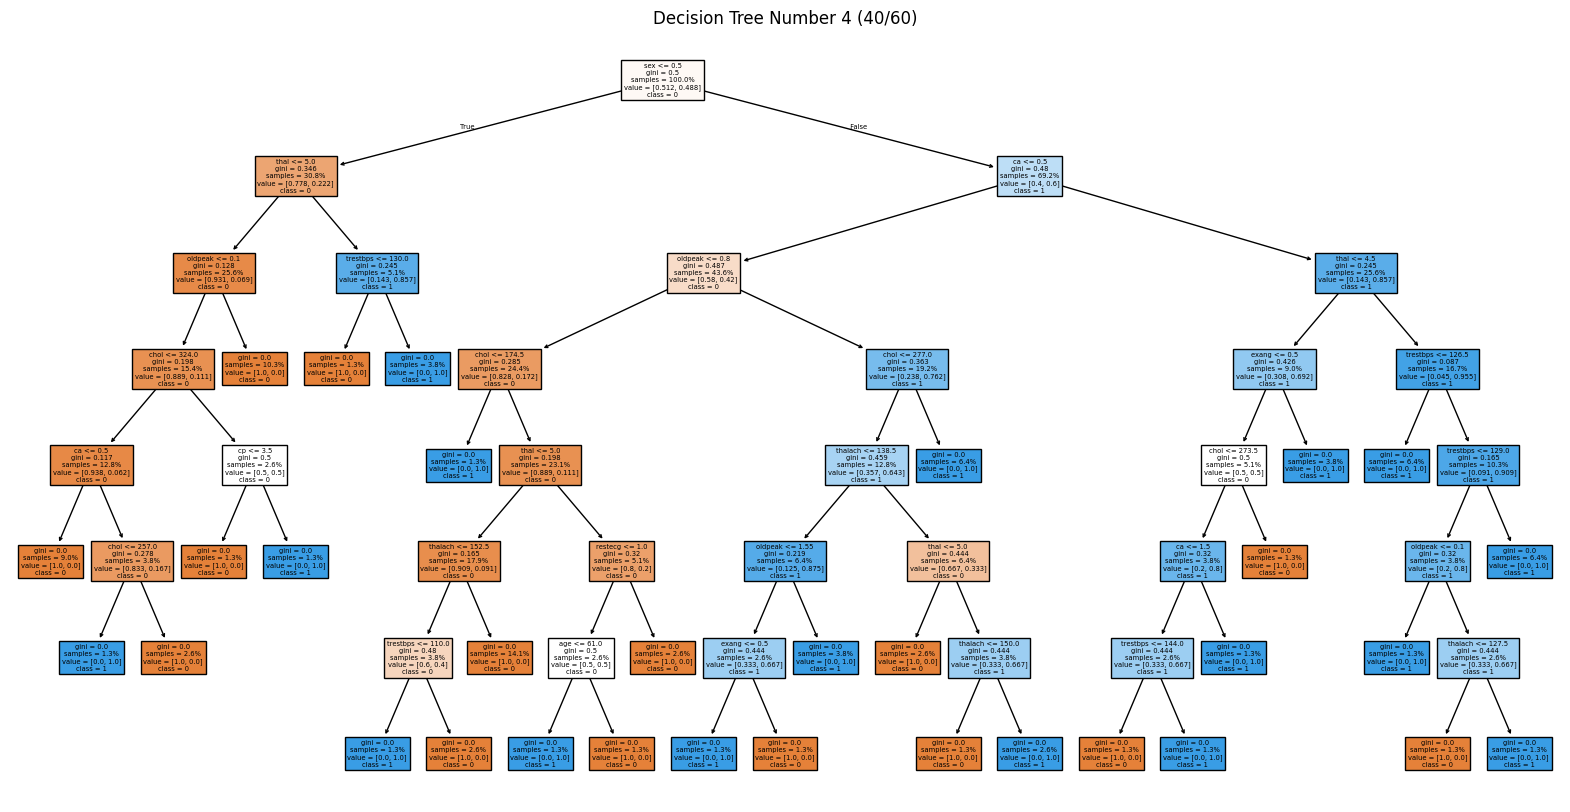

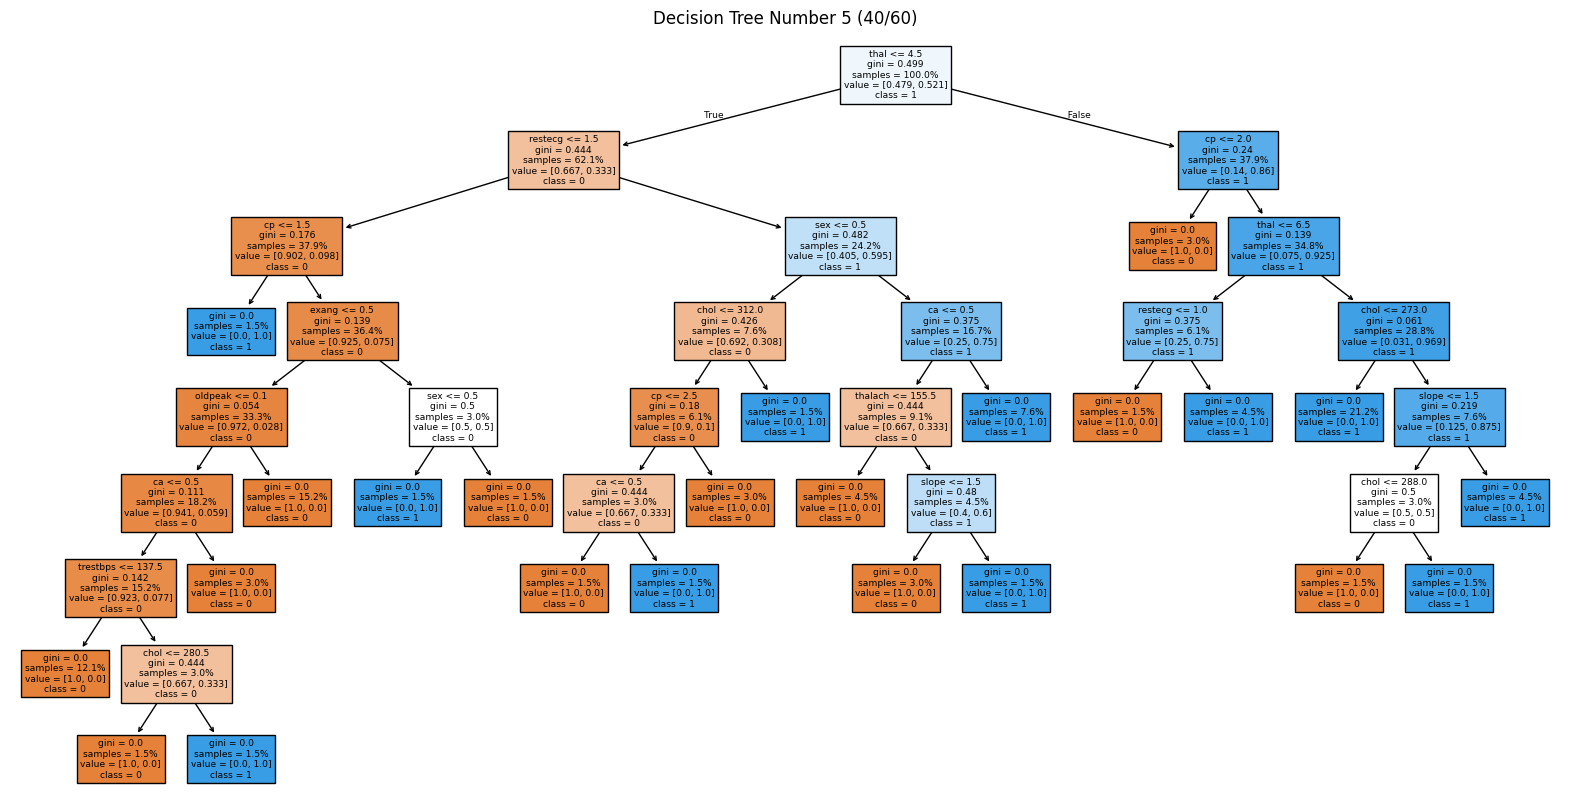

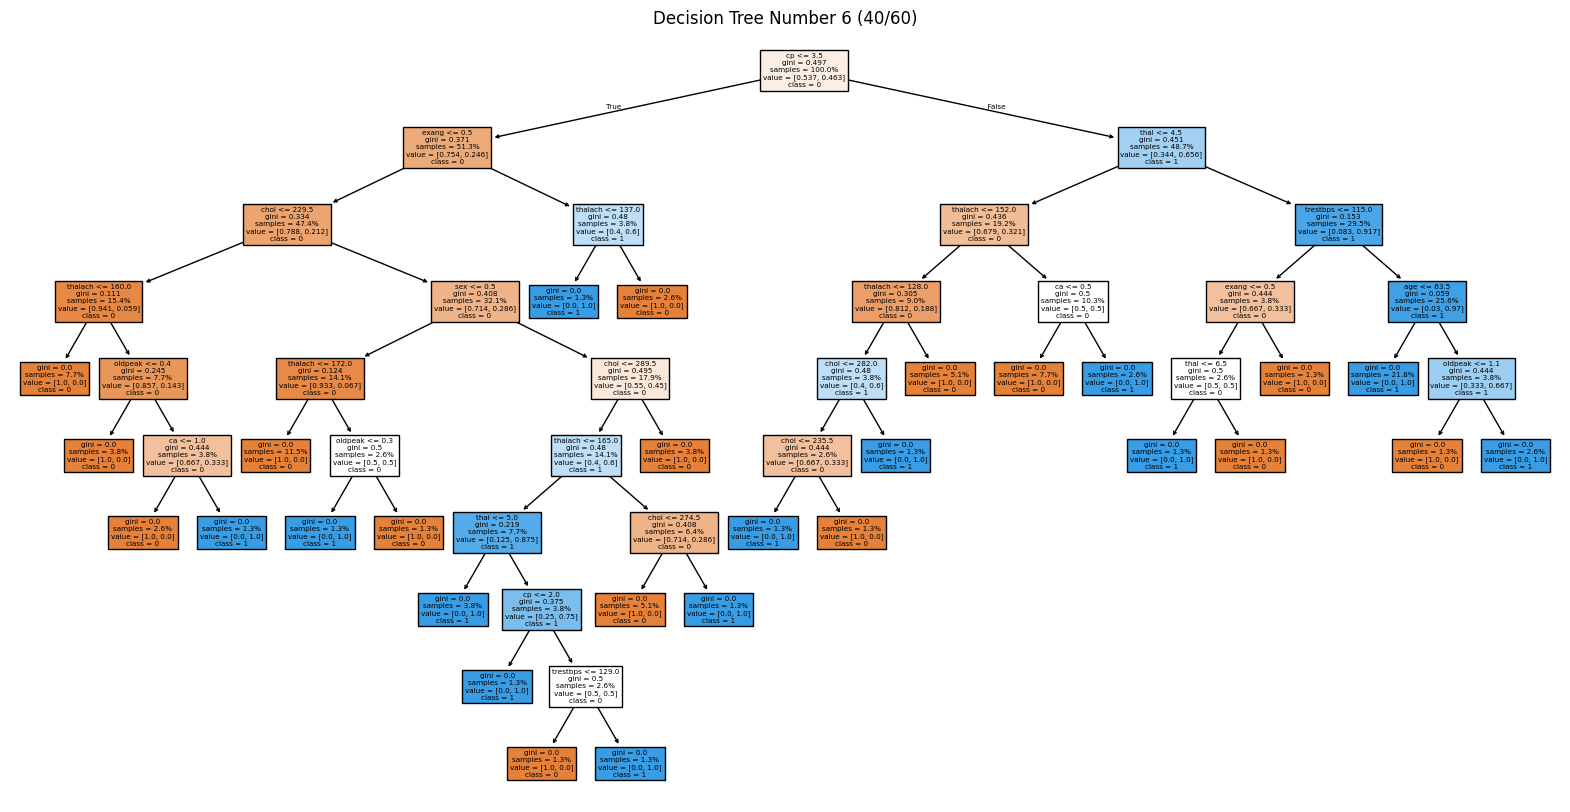

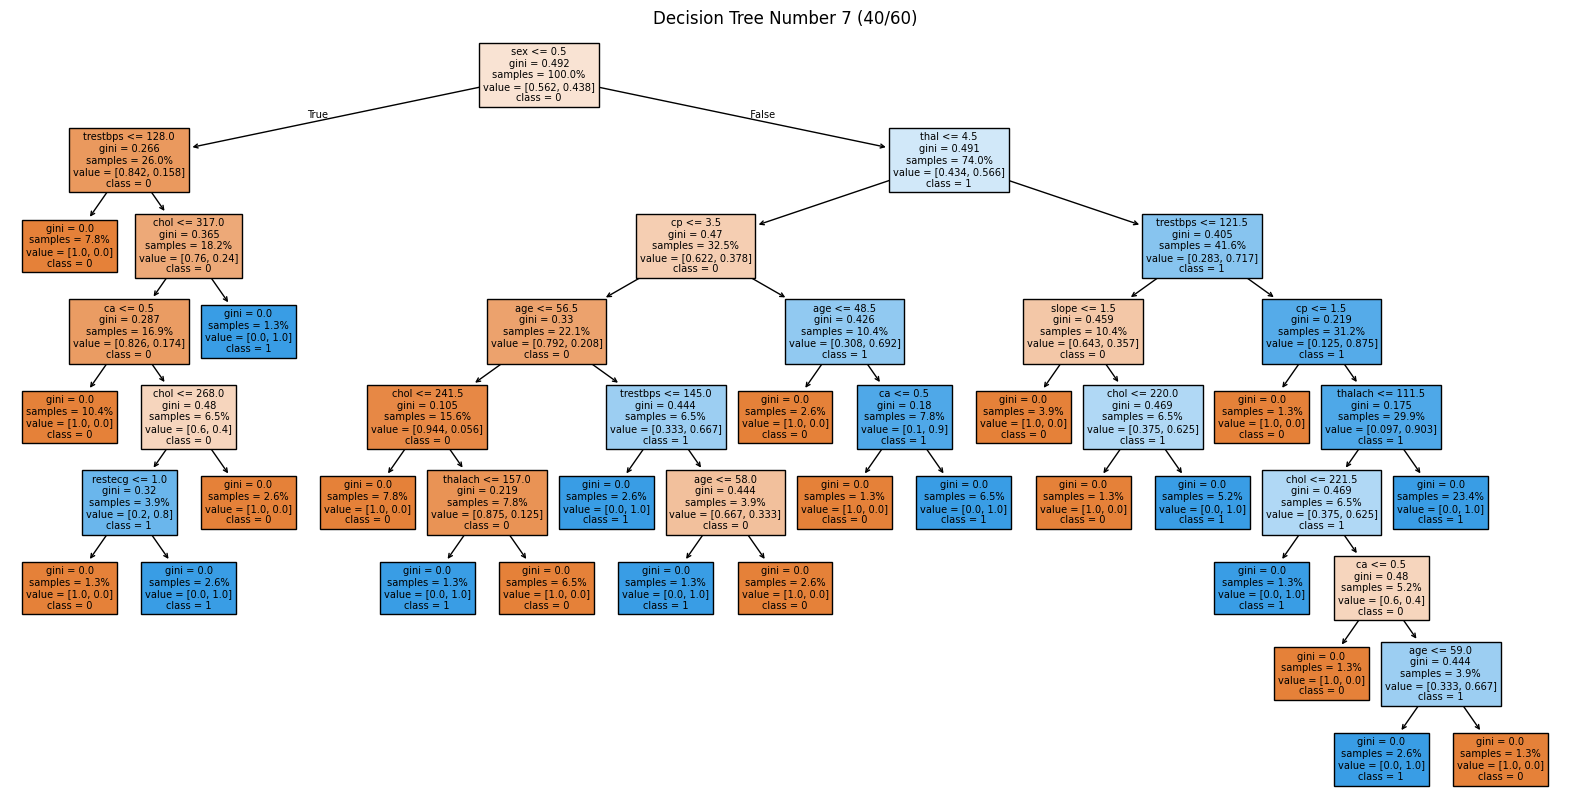

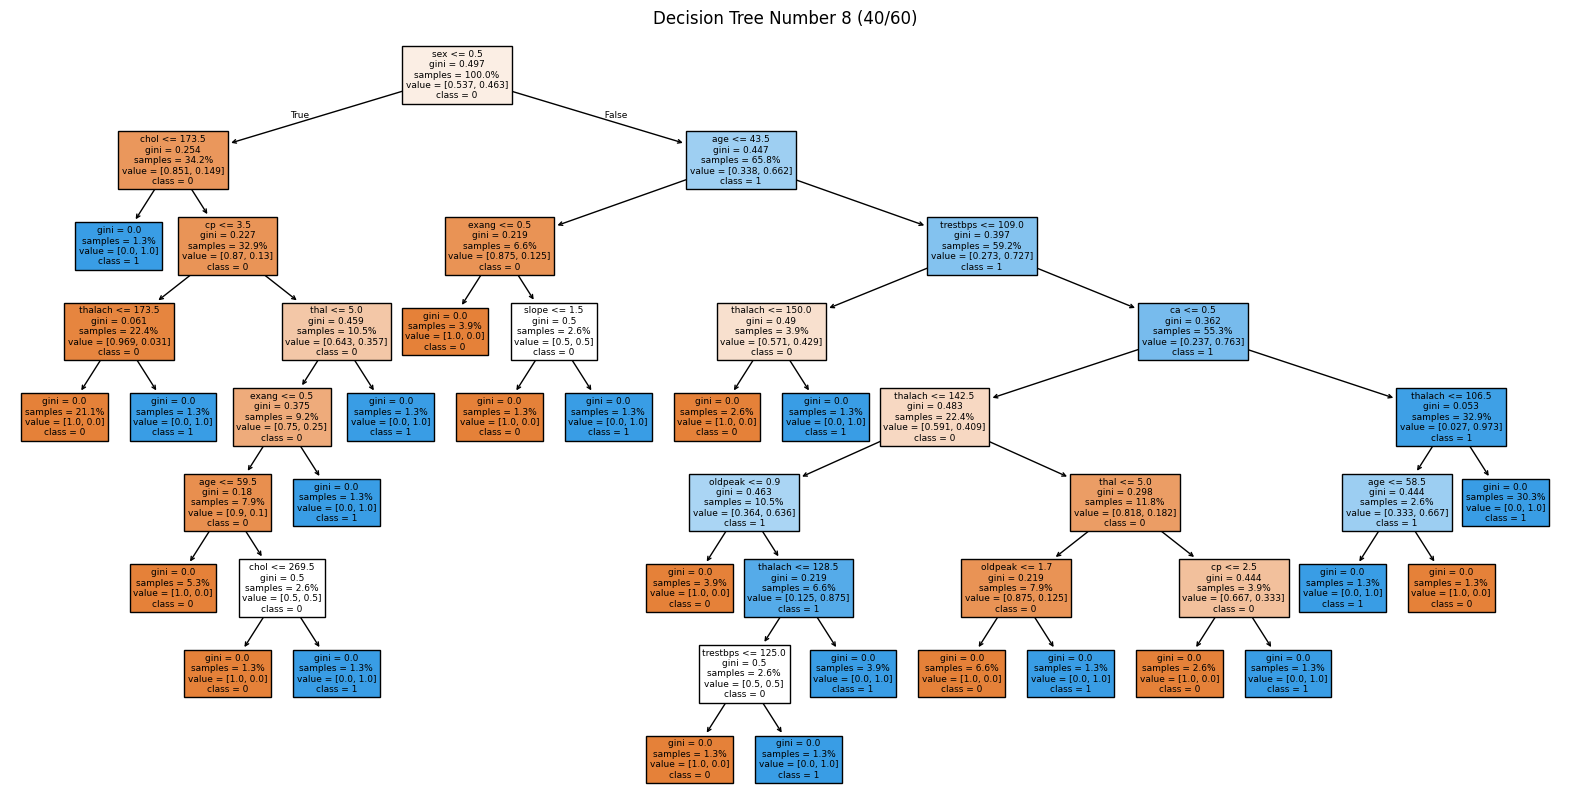

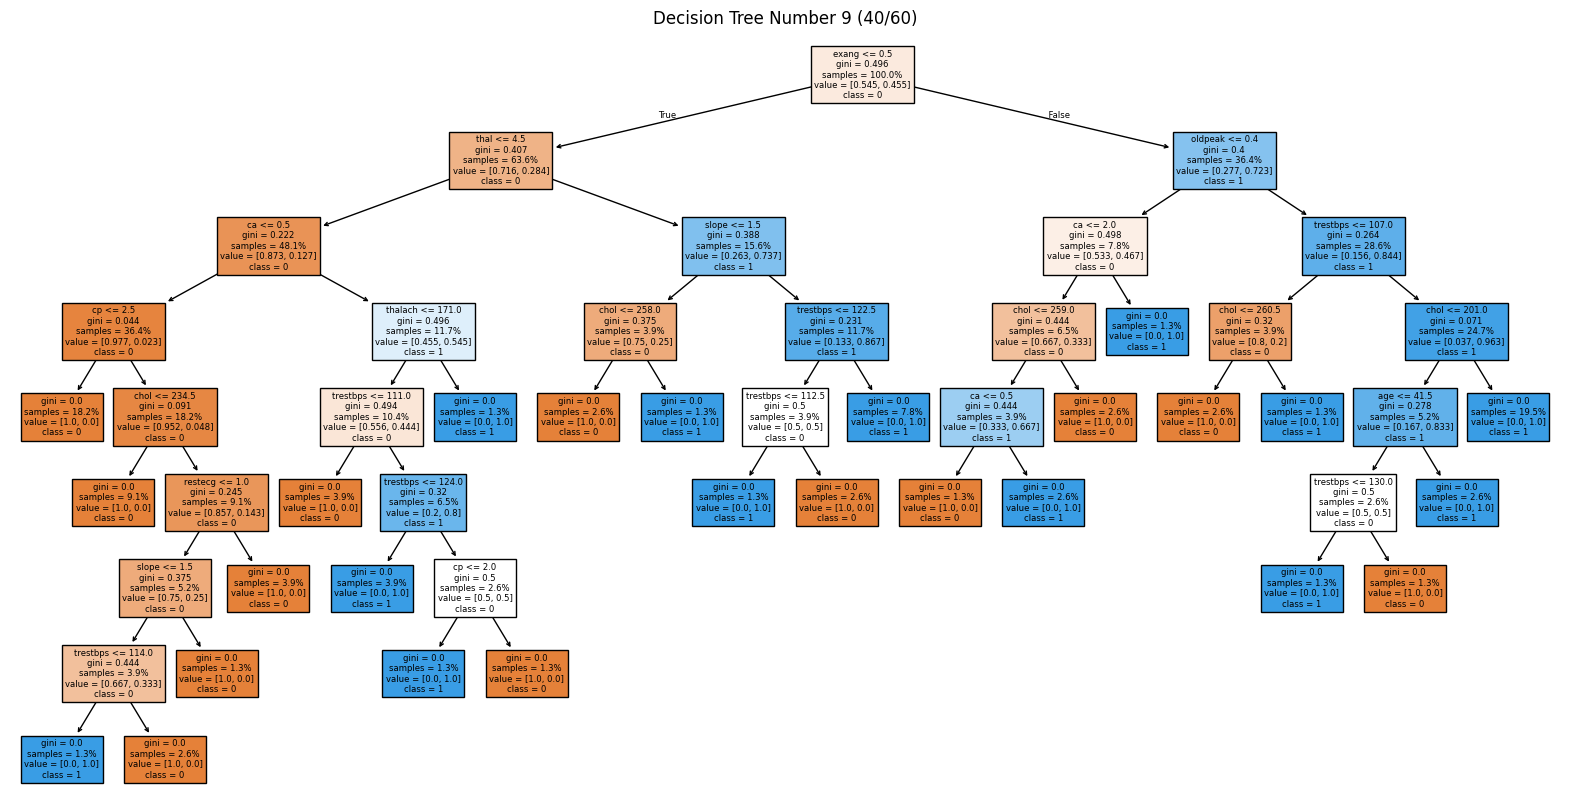

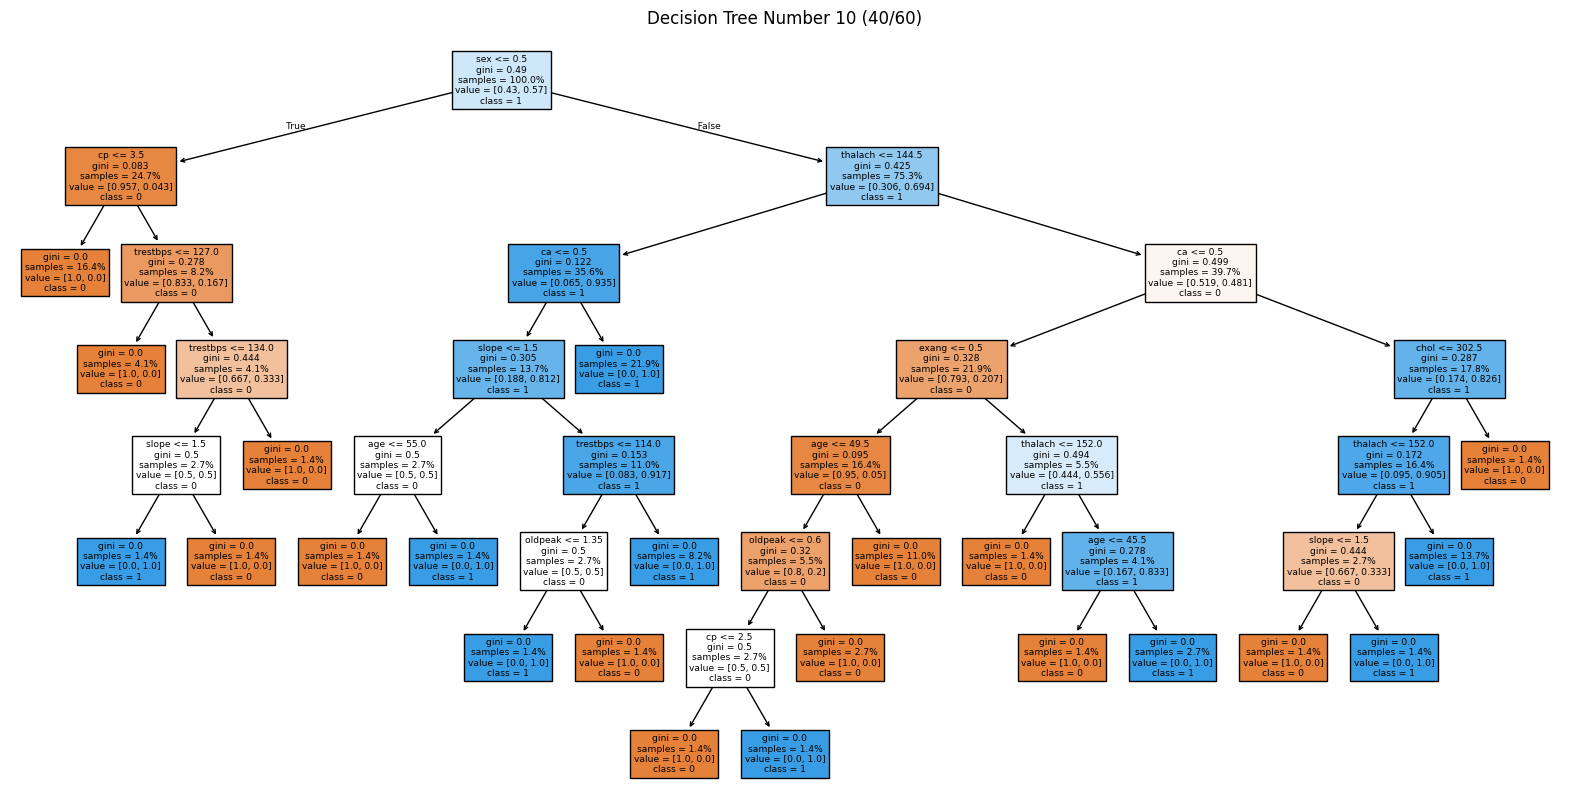

In [18]:
for i, tree in enumerate(clf_rf_40_60.estimators_):
    plt.figure(figsize=(20,10))
    plot_tree(
        tree,
        filled=True,
        feature_names=data['X_train'].columns.tolist(), 
        class_names=clf_rf_40_60.classes_.astype(str),
        proportion=True
    )
    plt.title(f"Decision Tree Number {i+1} ({key})")
    plt.show()

In [19]:
key = '40/60'
data = subsets[key]

y_true = data['y_test']
y_pred_rf = clf_rf_40_60.predict(data['X_test'])

accuracy = accuracy_score(y_true, y_pred_rf)

misclassified_count = (y_pred_rf != y_true).sum()
total_samples = len(y_true)
misclassified_rate = 100 * misclassified_count / total_samples

print(f"Numbers of Wrong labels: {misclassified_count}/{total_samples}")
print(f"Ratio of wrong labels: {misclassified_rate:.2f}%")

Numbers of Wrong labels: 32/182
Ratio of wrong labels: 17.58%


Random Forest : To make it simple we know understand that Random is Random and Forest is a set of Tree. So that in this algorithm we need to build many desicion tree and each of them has randomize order and which Features is used in each step. After we random n data from the dataset then we randomize k features from the set of features(Each features could be the same) and then we weight bias of each Tree output to build the final model.

As we see random forest goes with a better accuracy than traditional Decision Tree.

# REFERENCES

https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html<br>